In [15]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [16]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [17]:
y.shape, tx.shape

((10000,), (10000, 2))

## answers of the questions

1) In the tx we have two columns: the first one tx[0] represents only 0-1, it describes if the persons we are talking about is a male (0) or a famale(1); the second column in equal to the height of the persson itesel.
<br>
<br>
2) each row represents one person
<br>
<br>
3) y = 3 x 1 and X = 3 x 2 ;  X[32] would represent the height of the person we are considering


# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [18]:
w = np.array((1,2))

In [19]:
w

array([1, 2])

In [20]:
def compute_loss(y, tx, w):
    e = y - np.dot(tx,w)
    return 1/(2*len(y))*sum(abs(e))

# 2 Grid Search

Fill in the function `grid_search()` below:

In [21]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

In [22]:
w0, w1 = generate_w(num_intervals=10)

In [23]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i in range(len(w0)):
        for j in range(len(w1)):
            w = np.array([int(grid_w0[i]), int(grid_w1[j])] )
            losses[i,j] = compute_loss(y,tx,w)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=3.975552817253795, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.156 seconds


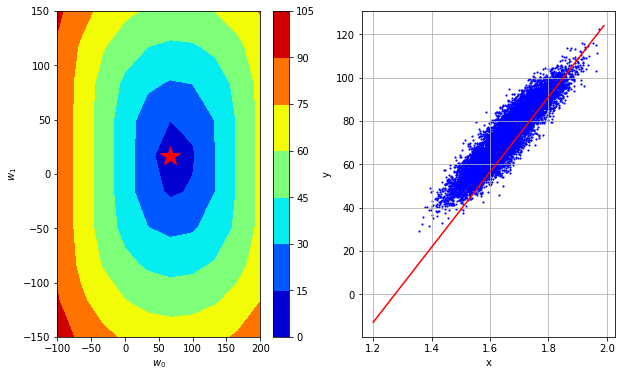

In [24]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

In [25]:
dh = y - np.dot(tx,w)
dh[dh ==0] = random.uniform(-1,1)
dh[dh>0] = 1
dh[dh<0] = -1

In [26]:
1/len(y)*np.dot(np.transpose(tx),dh)

array([  1.00000000e+00,  -2.63753464e-15])

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [27]:
def compute_gradient(y, tx, w):
    dh = y - np.dot(tx,w)
    dh[dh ==0] = random.uniform(-1,1)
    dh[dh>0] = 1
    dh[dh<0] = -1
    return -1/len(y)*np.dot(np.transpose(tx),dh)

In [28]:
compute_gradient(y, tx, w)

array([ -1.00000000e+00,   2.63753464e-15])

Please fill in the functions `gradient_descent` below:

In [29]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        G = compute_gradient(y, tx,w)
        loss = compute_loss(y, tx,w)
        w = w-gamma*G
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [32]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 500
gamma = 10

# Initialization
w_initial = np.array([100, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/499): loss=13.353038998947419, w0=90.0, w1=10.000000000000027
Gradient Descent(1/499): loss=8.35581450879489, w0=80.048, w1=10.040192172320344
Gradient Descent(2/499): loss=3.866739842172617, w0=73.37, w1=12.42605328415944
Gradient Descent(3/499): loss=2.2661956746785332, w0=73.196, w1=14.343849276510966
Gradient Descent(4/499): loss=2.23720036415093, w0=73.212, w1=13.084750162979685
Gradient Descent(5/499): loss=2.2209589812828026, w0=73.26, w1=13.87372525280404
Gradient Descent(6/499): loss=2.216780964097546, w0=73.218, w1=13.382967495732178
Gradient Descent(7/499): loss=2.213239482009118, w0=73.266, w1=13.626079688515658
Gradient Descent(8/499): loss=2.2126931771244, w0=73.23, w1=13.463723325741814
Gradient Descent(9/499): loss=2.2124936581092505, w0=73.26, w1=13.580705380999392
Gradient Descent(10/499): loss=2.212417156427818, w0=73.25, w1=13.505461047316814
Gradient Descent(11/499): loss=2.2123412283796107, w0=73.23, w1=13.543879475852359
Gradient Descent(12/499

Gradient Descent(175/499): loss=2.2123157949143963, w0=73.24000000000001, w1=13.523469213596872
Gradient Descent(176/499): loss=2.212315801040993, w0=73.242, w1=13.526653636823506
Gradient Descent(177/499): loss=2.2123158606868447, w0=73.242, w1=13.526165820415569
Gradient Descent(178/499): loss=2.2123158487886077, w0=73.242, w1=13.525678004007633
Gradient Descent(179/499): loss=2.2123158368903724, w0=73.242, w1=13.525190187599696
Gradient Descent(180/499): loss=2.2123158249921104, w0=73.242, w1=13.52470237119176
Gradient Descent(181/499): loss=2.2123158164646837, w0=73.24000000000001, w1=13.524519666885087
Gradient Descent(182/499): loss=2.212315808637577, w0=73.24000000000001, w1=13.52403185047715
Gradient Descent(183/499): loss=2.212315796739339, w0=73.24000000000001, w1=13.523544034069214
Gradient Descent(184/499): loss=2.2123157891280147, w0=73.242, w1=13.526728457295848
Gradient Descent(185/499): loss=2.2123158625117787, w0=73.242, w1=13.526240640887911
Gradient Descent(186/499):

Gradient Descent(345/499): loss=2.212315809441507, w0=73.24000000000001, w1=13.524064810700185
Gradient Descent(346/499): loss=2.2123157975432637, w0=73.24000000000001, w1=13.523576994292249
Gradient Descent(347/499): loss=2.2123157856450106, w0=73.24000000000001, w1=13.523089177884312
Gradient Descent(348/499): loss=2.212315861550751, w0=73.242, w1=13.526273601110946
Gradient Descent(349/499): loss=2.212315851417465, w0=73.242, w1=13.52578578470301
Gradient Descent(350/499): loss=2.2123158395192255, w0=73.242, w1=13.525297968295073
Gradient Descent(351/499): loss=2.2123158276209858, w0=73.242, w1=13.524810151887136
Gradient Descent(352/499): loss=2.2123158174492805, w0=73.24000000000001, w1=13.524627447580464
Gradient Descent(353/499): loss=2.2123158112664267, w0=73.24000000000001, w1=13.524139631172527
Gradient Descent(354/499): loss=2.2123157993681946, w0=73.24000000000001, w1=13.523651814764591
Gradient Descent(355/499): loss=2.2123157874699397, w0=73.24000000000001, w1=13.52316399

In [33]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [34]:
for minibatch_y, minibatch_tx in batch_iter(y, tx, 1, num_batches=1):
    print(minibatch_y)
    print(minibatch_tx)

[ 89.4701687]
[[ 1.          0.90764841]]


In [43]:
def compute_stoch_gradient(y, tx, w):
    dh = y - np.dot(tx,w)
    dh[dh ==0] = random.uniform(-1,1)
    dh[dh>0] = 1
    dh[dh<0] = -1
    Gd = [np.repeat(-1,tx.shape[0]),-tx[:,1]]
    return 1/(len(y))*np.sum((dh*Gd), axis = 1)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            y_i = minibatch_y
            tx_i = minibatch_tx
        G = compute_stoch_gradient(y_i, tx_i,w)
        loss = compute_loss(y_i, tx_i,w)
        w = w-gamma*G
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [45]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 10000
gamma = 0.9
batch_size = 32

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/9999): loss=36.46182313041229, w0=0.9, w1=0.10621323476136003
Gradient Descent(1/9999): loss=34.719429066353925, w0=1.8, w1=-0.17082917764567668
Gradient Descent(2/9999): loss=36.72095075646453, w0=2.7, w1=-0.13414895010592992
Gradient Descent(3/9999): loss=34.26330927143814, w0=3.6, w1=-0.24428341248733426
Gradient Descent(4/9999): loss=32.94412038001646, w0=4.5, w1=-0.5219780193393821
Gradient Descent(5/9999): loss=34.81173565900275, w0=5.4, w1=-0.5785636023366431
Gradient Descent(6/9999): loss=33.59265488339688, w0=6.300000000000001, w1=-0.5781935533195695
Gradient Descent(7/9999): loss=32.63689082307092, w0=7.200000000000001, w1=-0.6702518630347838
Gradient Descent(8/9999): loss=32.85364922286803, w0=8.100000000000001, w1=-0.6273222717193376
Gradient Descent(9/9999): loss=33.53720432138777, w0=9.000000000000002, w1=-0.5347708092717431
Gradient Descent(10/9999): loss=32.59862134203556, w0=9.900000000000002, w1=-0.4799098424186732
Gradient Descent(11/9999): loss=30

Gradient Descent(303/9999): loss=2.1761459663042095, w0=73.23749999999997, w1=13.797683951439621
Gradient Descent(304/9999): loss=2.14646755445415, w0=73.01249999999997, w1=13.953804198100858
Gradient Descent(305/9999): loss=2.063195425768477, w0=73.01249999999997, w1=14.163187872823428
Gradient Descent(306/9999): loss=2.4006868652720614, w0=73.29374999999997, w1=14.183786418180844
Gradient Descent(307/9999): loss=2.601167834314133, w0=73.40624999999997, w1=13.857874575164862
Gradient Descent(308/9999): loss=2.4102861631682613, w0=73.18124999999998, w1=13.792094048141932
Gradient Descent(309/9999): loss=1.7584869990045722, w0=73.18124999999998, w1=13.854203369978048
Gradient Descent(310/9999): loss=1.483763640879923, w0=73.01249999999997, w1=13.904697181676068
Gradient Descent(311/9999): loss=1.8634653917364834, w0=73.06874999999998, w1=13.982387774451087
Gradient Descent(312/9999): loss=2.3716043491875007, w0=72.89999999999998, w1=14.161107596491702
Gradient Descent(313/9999): loss=1.

Gradient Descent(558/9999): loss=2.2468632769475576, w0=73.40624999999996, w1=13.838319707351937
Gradient Descent(559/9999): loss=2.455911005989102, w0=73.40624999999996, w1=13.755457408030498
Gradient Descent(560/9999): loss=1.951803814333142, w0=73.46249999999996, w1=13.702599916054332
Gradient Descent(561/9999): loss=2.3682876077306445, w0=73.18124999999996, w1=13.699953370748796
Gradient Descent(562/9999): loss=2.2339260397171454, w0=73.18124999999996, w1=13.697561774282944
Gradient Descent(563/9999): loss=2.3709794010453087, w0=73.18124999999996, w1=13.918546077097817
Gradient Descent(564/9999): loss=2.489243494406865, w0=73.40624999999996, w1=13.930023983429223
Gradient Descent(565/9999): loss=2.361299484751866, w0=73.40624999999996, w1=13.872843405631675
Gradient Descent(566/9999): loss=2.258479057675567, w0=73.46249999999996, w1=13.730259805263497
Gradient Descent(567/9999): loss=1.8570267834010603, w0=73.34999999999997, w1=13.471718336366353
Gradient Descent(568/9999): loss=2.

Gradient Descent(846/9999): loss=2.149605753412464, w0=72.78750000000004, w1=13.426710612165106
Gradient Descent(847/9999): loss=1.9734999488416616, w0=72.73125000000003, w1=13.267135783185278
Gradient Descent(848/9999): loss=2.0049014544583894, w0=72.73125000000003, w1=13.426901340927028
Gradient Descent(849/9999): loss=2.660681054957565, w0=72.78750000000004, w1=13.260878884846719
Gradient Descent(850/9999): loss=2.2736899124272774, w0=72.95625000000004, w1=13.142248342376377
Gradient Descent(851/9999): loss=2.2214986172926814, w0=73.01250000000005, w1=13.291289954663291
Gradient Descent(852/9999): loss=2.1463263616881156, w0=73.06875000000005, w1=13.23543458108276
Gradient Descent(853/9999): loss=1.9986676662990641, w0=73.01250000000005, w1=13.2476548907605
Gradient Descent(854/9999): loss=2.188338033607155, w0=72.84375000000004, w1=13.086645283873946
Gradient Descent(855/9999): loss=2.223224596710486, w0=72.61875000000005, w1=13.142556183083157
Gradient Descent(856/9999): loss=2.37

Gradient Descent(1131/9999): loss=2.480354738794685, w0=73.29375000000006, w1=13.864129910043333
Gradient Descent(1132/9999): loss=2.17785566654947, w0=73.29375000000006, w1=13.549327466014923
Gradient Descent(1133/9999): loss=2.4842159517516094, w0=73.23750000000005, w1=13.560546489089267
Gradient Descent(1134/9999): loss=2.860344026367787, w0=73.23750000000005, w1=13.5278524496221
Gradient Descent(1135/9999): loss=2.586990589565617, w0=73.35000000000005, w1=13.344739257956128
Gradient Descent(1136/9999): loss=2.701308917825244, w0=73.40625000000006, w1=13.465481165193106
Gradient Descent(1137/9999): loss=2.205845500297972, w0=73.57500000000006, w1=13.612555447848159
Gradient Descent(1138/9999): loss=2.6232524875311203, w0=73.35000000000007, w1=13.635058990423493
Gradient Descent(1139/9999): loss=2.261842061129948, w0=73.23750000000007, w1=13.392205938297662
Gradient Descent(1140/9999): loss=1.9974672943481022, w0=73.18125000000006, w1=13.496898306309687
Gradient Descent(1141/9999): l

Gradient Descent(1433/9999): loss=2.332081227599149, w0=73.63125000000004, w1=13.612080400052832
Gradient Descent(1434/9999): loss=2.1149374372284395, w0=73.51875000000004, w1=14.013752156336938
Gradient Descent(1435/9999): loss=2.053114128977865, w0=73.51875000000004, w1=14.043380511847719
Gradient Descent(1436/9999): loss=2.5603909279437214, w0=73.57500000000005, w1=14.071677166239219
Gradient Descent(1437/9999): loss=1.9315963318237512, w0=73.46250000000005, w1=13.863212809310387
Gradient Descent(1438/9999): loss=2.550075730369096, w0=73.35000000000005, w1=13.904046610617563
Gradient Descent(1439/9999): loss=2.223673602657258, w0=73.18125000000005, w1=13.736049431326002
Gradient Descent(1440/9999): loss=2.473743169210736, w0=73.06875000000005, w1=13.692569413984819
Gradient Descent(1441/9999): loss=2.519241116153198, w0=72.90000000000005, w1=13.649167454506335
Gradient Descent(1442/9999): loss=2.1163189261114415, w0=72.84375000000004, w1=13.69078419572675
Gradient Descent(1443/9999)

Gradient Descent(1678/9999): loss=2.1381694888406146, w0=73.40624999999996, w1=13.921686267163137
Gradient Descent(1679/9999): loss=2.431085292642641, w0=73.12499999999996, w1=14.073828893663839
Gradient Descent(1680/9999): loss=2.4244383126700724, w0=73.06874999999995, w1=14.058399549931481
Gradient Descent(1681/9999): loss=2.1850644055201505, w0=73.23749999999995, w1=14.175372751788563
Gradient Descent(1682/9999): loss=2.13724392560422, w0=73.18124999999995, w1=14.292658163284154
Gradient Descent(1683/9999): loss=2.1368495770629425, w0=73.23749999999995, w1=14.241962954301265
Gradient Descent(1684/9999): loss=2.3257491222800226, w0=73.01249999999996, w1=14.04351105602544
Gradient Descent(1685/9999): loss=2.288508469062528, w0=73.29374999999996, w1=14.256255769109138
Gradient Descent(1686/9999): loss=1.8631659307532464, w0=73.46249999999996, w1=14.380528090133051
Gradient Descent(1687/9999): loss=2.2732977892430615, w0=73.40624999999996, w1=14.209535873292202
Gradient Descent(1688/999

Gradient Descent(1949/9999): loss=2.515253307975021, w0=73.01249999999996, w1=14.04381407051236
Gradient Descent(1950/9999): loss=2.369022996738029, w0=72.78749999999997, w1=13.790021802802027
Gradient Descent(1951/9999): loss=2.0346928070605514, w0=72.73124999999996, w1=13.620568705195456
Gradient Descent(1952/9999): loss=2.1639706373220533, w0=72.61874999999996, w1=13.671441482431897
Gradient Descent(1953/9999): loss=2.1034860003309426, w0=72.89999999999996, w1=13.884311046603639
Gradient Descent(1954/9999): loss=1.7224199662668538, w0=72.89999999999996, w1=14.06429469591128
Gradient Descent(1955/9999): loss=2.6895752534394326, w0=73.01249999999996, w1=14.526167999448052
Gradient Descent(1956/9999): loss=2.862420462179408, w0=72.95624999999995, w1=14.185229115197034
Gradient Descent(1957/9999): loss=2.4216567529588584, w0=72.89999999999995, w1=14.381084745310048
Gradient Descent(1958/9999): loss=1.865004017138737, w0=72.78749999999995, w1=14.291139718066864
Gradient Descent(1959/9999

Gradient Descent(2217/9999): loss=1.9591355268044244, w0=73.35, w1=14.011203989131657
Gradient Descent(2218/9999): loss=2.2923953322485158, w0=73.51875, w1=13.99299856957525
Gradient Descent(2219/9999): loss=2.3209129420994143, w0=73.40625, w1=14.00819125849911
Gradient Descent(2220/9999): loss=2.2603606212830476, w0=73.40625, w1=13.97379299269309
Gradient Descent(2221/9999): loss=1.8554781197978127, w0=73.40625, w1=13.67027379303107
Gradient Descent(2222/9999): loss=2.1734860510095784, w0=73.63125, w1=13.433729054796993
Gradient Descent(2223/9999): loss=2.148465718686775, w0=73.35, w1=13.454458945807467
Gradient Descent(2224/9999): loss=1.9805880805265095, w0=73.125, w1=13.688070018096315
Gradient Descent(2225/9999): loss=1.8949648765432752, w0=72.9, w1=13.55163112012388
Gradient Descent(2226/9999): loss=1.818622371724684, w0=72.73125, w1=13.527098343317656
Gradient Descent(2227/9999): loss=2.4638576231438587, w0=73.0125, w1=13.496826283090384
Gradient Descent(2228/9999): loss=1.70614

Gradient Descent(2492/9999): loss=2.557015992374466, w0=73.12499999999997, w1=13.340099154715743
Gradient Descent(2493/9999): loss=2.39094711139885, w0=73.06874999999997, w1=13.282229433605908
Gradient Descent(2494/9999): loss=2.2554367852733277, w0=72.95624999999997, w1=13.223354840671306
Gradient Descent(2495/9999): loss=2.744081903827335, w0=72.73124999999997, w1=13.365042293724771
Gradient Descent(2496/9999): loss=2.2873185713105744, w0=72.73124999999997, w1=13.782956675543264
Gradient Descent(2497/9999): loss=2.2366105305137367, w0=73.01249999999997, w1=13.74253554679832
Gradient Descent(2498/9999): loss=2.410892473260998, w0=72.89999999999998, w1=14.021546116566135
Gradient Descent(2499/9999): loss=2.466106993456256, w0=72.84374999999997, w1=13.935846203223639
Gradient Descent(2500/9999): loss=2.3384589584086406, w0=73.06874999999997, w1=13.810077215424315
Gradient Descent(2501/9999): loss=1.9235394415305036, w0=73.12499999999997, w1=14.126074317798755
Gradient Descent(2502/9999)

Gradient Descent(2771/9999): loss=2.4232477366100262, w0=72.84375, w1=13.298737591664729
Gradient Descent(2772/9999): loss=2.111499531473723, w0=73.06875, w1=13.270780809193546
Gradient Descent(2773/9999): loss=1.8664337164626637, w0=73.18124999999999, w1=13.380340056385679
Gradient Descent(2774/9999): loss=2.253234664092295, w0=73.01249999999999, w1=13.529803005180549
Gradient Descent(2775/9999): loss=2.1855768612530295, w0=72.89999999999999, w1=13.608354577206452
Gradient Descent(2776/9999): loss=2.4840260396197493, w0=72.84374999999999, w1=13.72909450222737
Gradient Descent(2777/9999): loss=2.477028947412588, w0=73.01249999999999, w1=13.969947747288316
Gradient Descent(2778/9999): loss=1.9307270729082278, w0=72.84374999999999, w1=13.94492376663958
Gradient Descent(2779/9999): loss=2.5096630916281706, w0=72.78749999999998, w1=13.621915422541818
Gradient Descent(2780/9999): loss=2.3669718797659787, w0=72.56249999999999, w1=13.539152990269821
Gradient Descent(2781/9999): loss=2.7567339

Gradient Descent(2958/9999): loss=2.1702579735276397, w0=73.63125000000007, w1=13.055754284074885
Gradient Descent(2959/9999): loss=2.1979353676468305, w0=73.63125000000007, w1=12.958337194920054
Gradient Descent(2960/9999): loss=2.2119419964583003, w0=73.63125000000007, w1=13.14807728572649
Gradient Descent(2961/9999): loss=2.246507696576452, w0=73.63125000000007, w1=13.366335551425003
Gradient Descent(2962/9999): loss=2.7643595693875724, w0=73.46250000000006, w1=13.42753196029778
Gradient Descent(2963/9999): loss=2.5631794758672433, w0=73.40625000000006, w1=13.229830320680948
Gradient Descent(2964/9999): loss=2.4646246343180067, w0=73.23750000000005, w1=13.224640619531375
Gradient Descent(2965/9999): loss=2.090106952736538, w0=73.29375000000006, w1=13.239872059374177
Gradient Descent(2966/9999): loss=2.500265645628991, w0=73.35000000000007, w1=13.12788869600722
Gradient Descent(2967/9999): loss=2.2474296540164183, w0=73.23750000000007, w1=13.623581009902706
Gradient Descent(2968/9999

Gradient Descent(3238/9999): loss=2.019182956288253, w0=73.57500000000005, w1=14.351934475674312
Gradient Descent(3239/9999): loss=2.3687155591035847, w0=73.63125000000005, w1=14.05213981970132
Gradient Descent(3240/9999): loss=2.4506845832565416, w0=73.46250000000005, w1=14.040922715276626
Gradient Descent(3241/9999): loss=2.0926204727105278, w0=73.46250000000005, w1=14.115623684388433
Gradient Descent(3242/9999): loss=2.3919277773147565, w0=73.29375000000005, w1=14.316656872954203
Gradient Descent(3243/9999): loss=2.171803051502153, w0=73.29375000000005, w1=14.188153372704658
Gradient Descent(3244/9999): loss=2.5253893256066444, w0=73.46250000000005, w1=13.913584334068506
Gradient Descent(3245/9999): loss=2.049618001266557, w0=73.40625000000004, w1=13.732693308934074
Gradient Descent(3246/9999): loss=2.884919672560838, w0=73.35000000000004, w1=13.748058727001718
Gradient Descent(3247/9999): loss=1.9250525563986494, w0=73.23750000000004, w1=13.949618505991488
Gradient Descent(3248/999

Gradient Descent(3536/9999): loss=1.9071971451852514, w0=73.40625000000007, w1=13.17540110314163
Gradient Descent(3537/9999): loss=1.6328756720384314, w0=73.01250000000007, w1=13.04058648537013
Gradient Descent(3538/9999): loss=2.219642666183635, w0=73.12500000000007, w1=13.467319431060787
Gradient Descent(3539/9999): loss=1.9053424262544387, w0=73.06875000000007, w1=13.33907510922373
Gradient Descent(3540/9999): loss=1.825236366085413, w0=73.06875000000007, w1=13.400055766982861
Gradient Descent(3541/9999): loss=2.0411098154777916, w0=73.46250000000006, w1=13.742900754958306
Gradient Descent(3542/9999): loss=1.97483521589516, w0=73.46250000000006, w1=13.389144012845836
Gradient Descent(3543/9999): loss=2.6061574306718662, w0=73.57500000000006, w1=13.232791610537067
Gradient Descent(3544/9999): loss=2.2880111552120272, w0=73.63125000000007, w1=13.12377084735844
Gradient Descent(3545/9999): loss=2.472478899437219, w0=73.57500000000006, w1=13.100703582339758
Gradient Descent(3546/9999): 

Gradient Descent(3806/9999): loss=1.850391180518413, w0=73.12500000000007, w1=13.053570850668448
Gradient Descent(3807/9999): loss=2.304729232042234, w0=72.95625000000007, w1=13.3051357554663
Gradient Descent(3808/9999): loss=1.8090595638974798, w0=72.95625000000007, w1=13.002663520774004
Gradient Descent(3809/9999): loss=2.5097126629646467, w0=73.12500000000007, w1=13.386080431415682
Gradient Descent(3810/9999): loss=2.399594003727925, w0=73.12500000000007, w1=13.326401316326852
Gradient Descent(3811/9999): loss=2.1363161185071187, w0=73.29375000000007, w1=13.353068974272926
Gradient Descent(3812/9999): loss=2.3070502084869604, w0=73.40625000000007, w1=13.531409433066878
Gradient Descent(3813/9999): loss=2.0238218623762116, w0=73.46250000000008, w1=13.792301575422757
Gradient Descent(3814/9999): loss=1.9829477421959778, w0=73.46250000000008, w1=13.532194170323095
Gradient Descent(3815/9999): loss=2.3271965455704535, w0=73.46250000000008, w1=13.600886883259767
Gradient Descent(3816/999

Gradient Descent(4093/9999): loss=2.2471762965798012, w0=73.29375000000016, w1=12.98535403541551
Gradient Descent(4094/9999): loss=2.3573064064178304, w0=73.29375000000016, w1=12.962953642211938
Gradient Descent(4095/9999): loss=2.42876102199213, w0=73.51875000000015, w1=13.041518359194173
Gradient Descent(4096/9999): loss=2.5702937847681664, w0=73.35000000000015, w1=13.190129724113696
Gradient Descent(4097/9999): loss=2.3267565201144835, w0=73.29375000000014, w1=13.399370221899582
Gradient Descent(4098/9999): loss=2.219486173417727, w0=73.40625000000014, w1=13.35588437781961
Gradient Descent(4099/9999): loss=3.0011418497165554, w0=73.29375000000014, w1=13.216157558374606
Gradient Descent(4100/9999): loss=2.1061910848258294, w0=72.95625000000014, w1=13.181383894198007
Gradient Descent(4101/9999): loss=1.893680769286445, w0=72.95625000000014, w1=13.075024327844293
Gradient Descent(4102/9999): loss=2.2169898208448195, w0=72.84375000000014, w1=12.85404536742991
Gradient Descent(4103/9999)

Gradient Descent(4372/9999): loss=2.359287807766677, w0=73.80000000000011, w1=13.04864675004373
Gradient Descent(4373/9999): loss=2.121262338250014, w0=73.51875000000011, w1=13.22818451565492
Gradient Descent(4374/9999): loss=2.288558643041854, w0=73.29375000000012, w1=13.364432778957331
Gradient Descent(4375/9999): loss=2.355458455527719, w0=73.18125000000012, w1=13.317327840744355
Gradient Descent(4376/9999): loss=2.412105971306733, w0=72.84375000000011, w1=13.44965413649926
Gradient Descent(4377/9999): loss=2.582762482301454, w0=73.06875000000011, w1=13.443654721049796
Gradient Descent(4378/9999): loss=1.9512662202058109, w0=73.12500000000011, w1=13.538899164741364
Gradient Descent(4379/9999): loss=1.9034191626873895, w0=73.46250000000012, w1=13.417261038777422
Gradient Descent(4380/9999): loss=1.861504850712557, w0=73.51875000000013, w1=13.358997109778036
Gradient Descent(4381/9999): loss=1.907791197849249, w0=73.63125000000012, w1=13.369413755146775
Gradient Descent(4382/9999): lo

Gradient Descent(4650/9999): loss=2.2477240945877863, w0=73.06875000000014, w1=13.488048323956196
Gradient Descent(4651/9999): loss=2.0591188273218055, w0=73.18125000000013, w1=13.558698255792196
Gradient Descent(4652/9999): loss=2.6565308253478026, w0=73.01250000000013, w1=13.786027353330846
Gradient Descent(4653/9999): loss=2.1049359864536967, w0=73.18125000000013, w1=13.733910123946519
Gradient Descent(4654/9999): loss=2.3318493944363206, w0=73.23750000000014, w1=13.784389990668055
Gradient Descent(4655/9999): loss=2.226671012829467, w0=73.18125000000013, w1=13.653430143246347
Gradient Descent(4656/9999): loss=2.1332064202717853, w0=72.95625000000014, w1=13.924025687856947
Gradient Descent(4657/9999): loss=1.7284557983464661, w0=73.01250000000014, w1=13.961917837279561
Gradient Descent(4658/9999): loss=2.042337466798875, w0=73.18125000000015, w1=14.169424900290648
Gradient Descent(4659/9999): loss=2.4233493920473372, w0=73.18125000000015, w1=14.10762495201297
Gradient Descent(4660/9

Gradient Descent(4939/9999): loss=2.3825822409308017, w0=73.51875000000017, w1=13.708595761517453
Gradient Descent(4940/9999): loss=1.6720493950159894, w0=73.51875000000017, w1=13.743447366344078
Gradient Descent(4941/9999): loss=1.966510573702436, w0=73.51875000000017, w1=13.858580275766265
Gradient Descent(4942/9999): loss=2.0942001267984525, w0=73.51875000000017, w1=13.969879894854115
Gradient Descent(4943/9999): loss=1.7938719716670644, w0=73.46250000000016, w1=13.949956022684514
Gradient Descent(4944/9999): loss=2.6263634773169575, w0=73.68750000000016, w1=14.070608631267632
Gradient Descent(4945/9999): loss=1.9805454922727268, w0=73.74375000000016, w1=14.267672425155228
Gradient Descent(4946/9999): loss=2.3449170135803437, w0=73.74375000000016, w1=14.264001656655255
Gradient Descent(4947/9999): loss=2.2852796786092346, w0=73.51875000000017, w1=14.003528090367046
Gradient Descent(4948/9999): loss=1.9236455241016164, w0=73.46250000000016, w1=14.127685674802265
Gradient Descent(4949

Gradient Descent(5236/9999): loss=1.9947651968330127, w0=72.50625000000007, w1=13.623305612104305
Gradient Descent(5237/9999): loss=2.0245384809333453, w0=72.39375000000007, w1=13.865023806563114
Gradient Descent(5238/9999): loss=1.810624502800841, w0=72.33750000000006, w1=13.895676075387948
Gradient Descent(5239/9999): loss=2.797992846876844, w0=72.16875000000006, w1=13.954646745502316
Gradient Descent(5240/9999): loss=2.222690198456727, w0=72.28125000000006, w1=13.651343826342275
Gradient Descent(5241/9999): loss=2.215075706065835, w0=72.28125000000006, w1=13.502819660478439
Gradient Descent(5242/9999): loss=2.7315609584292413, w0=72.05625000000006, w1=13.73092253311983
Gradient Descent(5243/9999): loss=2.256145822031111, w0=72.11250000000007, w1=13.677361793203206
Gradient Descent(5244/9999): loss=2.6763659573590397, w0=72.33750000000006, w1=13.63584598085627
Gradient Descent(5245/9999): loss=2.6856515002281824, w0=72.28125000000006, w1=13.501061619397731
Gradient Descent(5246/9999)

Gradient Descent(5538/9999): loss=1.750230709882211, w0=73.68749999999991, w1=13.675320305453042
Gradient Descent(5539/9999): loss=2.0095543967820997, w0=73.79999999999991, w1=13.854556197574613
Gradient Descent(5540/9999): loss=2.0432913958223073, w0=73.79999999999991, w1=14.00849733901849
Gradient Descent(5541/9999): loss=2.0144978483967027, w0=73.85624999999992, w1=13.713344847139707
Gradient Descent(5542/9999): loss=2.261019065635207, w0=73.79999999999991, w1=13.963683824622303
Gradient Descent(5543/9999): loss=2.2364302528051674, w0=73.79999999999991, w1=13.94857867855674
Gradient Descent(5544/9999): loss=2.498543834720693, w0=73.91249999999991, w1=13.99720860397145
Gradient Descent(5545/9999): loss=2.075984413102705, w0=74.0249999999999, w1=13.882684290688971
Gradient Descent(5546/9999): loss=1.9468690801601087, w0=74.0249999999999, w1=13.784267138425788
Gradient Descent(5547/9999): loss=2.3528416604628015, w0=73.9687499999999, w1=13.461997226074155
Gradient Descent(5548/9999): l

Gradient Descent(5836/9999): loss=2.2831004593172466, w0=72.95624999999974, w1=13.023562578055826
Gradient Descent(5837/9999): loss=1.8554367538099514, w0=72.78749999999974, w1=13.225977581014831
Gradient Descent(5838/9999): loss=2.654561817642287, w0=72.89999999999974, w1=13.626016521640569
Gradient Descent(5839/9999): loss=2.864041242112475, w0=73.12499999999973, w1=13.518340592242469
Gradient Descent(5840/9999): loss=2.0762930839059335, w0=73.06874999999972, w1=13.59654908352617
Gradient Descent(5841/9999): loss=2.251288655914376, w0=72.95624999999973, w1=13.61860528729181
Gradient Descent(5842/9999): loss=2.4461556317168984, w0=72.95624999999973, w1=13.717465041875947
Gradient Descent(5843/9999): loss=2.0087911707042316, w0=73.06874999999972, w1=13.704805643431893
Gradient Descent(5844/9999): loss=2.5098511654998443, w0=73.23749999999973, w1=13.825879929608096
Gradient Descent(5845/9999): loss=2.560219847725979, w0=73.18124999999972, w1=14.091277398868684
Gradient Descent(5846/9999

Gradient Descent(6143/9999): loss=1.8705167179697348, w0=72.95624999999971, w1=13.542979925320108
Gradient Descent(6144/9999): loss=2.281937126972453, w0=73.01249999999972, w1=13.747668266842002
Gradient Descent(6145/9999): loss=2.023976693571975, w0=72.78749999999972, w1=13.88253829315354
Gradient Descent(6146/9999): loss=2.4226159876753792, w0=72.78749999999972, w1=13.592348346157557
Gradient Descent(6147/9999): loss=2.5413275883962916, w0=72.95624999999973, w1=13.54038400313779
Gradient Descent(6148/9999): loss=2.621878337236064, w0=73.06874999999972, w1=13.58716847787067
Gradient Descent(6149/9999): loss=2.4813431127785694, w0=73.06874999999972, w1=13.309417996003312
Gradient Descent(6150/9999): loss=2.8234288530807614, w0=72.89999999999972, w1=13.365033160280262
Gradient Descent(6151/9999): loss=2.355548095551039, w0=72.84374999999972, w1=13.351150039402798
Gradient Descent(6152/9999): loss=2.0481241471016824, w0=72.89999999999972, w1=13.267586632823186
Gradient Descent(6153/9999)

Gradient Descent(6428/9999): loss=2.024815362415829, w0=73.0687499999997, w1=13.507850242354609
Gradient Descent(6429/9999): loss=2.4678081058392363, w0=73.0687499999997, w1=13.346366833868128
Gradient Descent(6430/9999): loss=2.321131650187011, w0=72.8437499999997, w1=13.227439680567478
Gradient Descent(6431/9999): loss=1.9623427173428498, w0=72.7874999999997, w1=13.33162692571139
Gradient Descent(6432/9999): loss=2.4234207546542343, w0=73.01249999999969, w1=13.369011227846356
Gradient Descent(6433/9999): loss=1.8064146561628758, w0=72.95624999999968, w1=13.783704925139752
Gradient Descent(6434/9999): loss=2.51813333061992, w0=73.12499999999969, w1=13.88538582532522
Gradient Descent(6435/9999): loss=1.873305088456804, w0=73.1812499999997, w1=13.540843258893513
Gradient Descent(6436/9999): loss=2.1920773969296055, w0=73.2374999999997, w1=13.327942264153194
Gradient Descent(6437/9999): loss=1.9392067747702486, w0=73.1249999999997, w1=13.415596570499869
Gradient Descent(6438/9999): loss=

Gradient Descent(6607/9999): loss=2.0617825626923088, w0=73.29374999999968, w1=13.317811215488744
Gradient Descent(6608/9999): loss=2.605150597685374, w0=73.23749999999967, w1=13.15746007493752
Gradient Descent(6609/9999): loss=2.0943210330553503, w0=73.23749999999967, w1=13.159670057671542
Gradient Descent(6610/9999): loss=2.4952760665945597, w0=73.57499999999968, w1=13.114032150516095
Gradient Descent(6611/9999): loss=2.0224797028156254, w0=73.51874999999967, w1=13.077989993659738
Gradient Descent(6612/9999): loss=2.452323313926092, w0=73.74374999999966, w1=13.158487056406102
Gradient Descent(6613/9999): loss=2.272386283788266, w0=73.51874999999967, w1=13.31588764264035
Gradient Descent(6614/9999): loss=2.1270283372759238, w0=73.51874999999967, w1=13.22305254369313
Gradient Descent(6615/9999): loss=2.0468280253862687, w0=73.57499999999968, w1=13.521484746902331
Gradient Descent(6616/9999): loss=2.028861414641129, w0=73.63124999999968, w1=13.467846425477466
Gradient Descent(6617/9999)

Gradient Descent(6861/9999): loss=2.2797839853452224, w0=72.9562499999997, w1=13.557786066229756
Gradient Descent(6862/9999): loss=1.8661316040686433, w0=72.7312499999997, w1=13.354629543789374
Gradient Descent(6863/9999): loss=2.2359559967382028, w0=72.89999999999971, w1=13.51300476777603
Gradient Descent(6864/9999): loss=1.95559212028996, w0=72.89999999999971, w1=13.450812410605586
Gradient Descent(6865/9999): loss=2.580597404393055, w0=72.7312499999997, w1=13.603146637107049
Gradient Descent(6866/9999): loss=1.8794699070333278, w0=72.50624999999971, w1=13.7178403859712
Gradient Descent(6867/9999): loss=1.8151522189052045, w0=72.50624999999971, w1=13.481348449699837
Gradient Descent(6868/9999): loss=1.9607025493375314, w0=72.61874999999971, w1=13.64767993198339
Gradient Descent(6869/9999): loss=2.3728187629485027, w0=72.7312499999997, w1=13.635367027935406
Gradient Descent(6870/9999): loss=2.686598875622656, w0=72.5624999999997, w1=13.347278297357224
Gradient Descent(6871/9999): loss

Gradient Descent(7165/9999): loss=1.737746498724009, w0=73.12499999999973, w1=13.84839408465706
Gradient Descent(7166/9999): loss=2.079037834393961, w0=73.12499999999973, w1=14.011774402037545
Gradient Descent(7167/9999): loss=2.745791733693399, w0=73.06874999999972, w1=14.061347121178372
Gradient Descent(7168/9999): loss=2.2450929425056545, w0=73.01249999999972, w1=13.871891419030794
Gradient Descent(7169/9999): loss=2.665115959845928, w0=73.06874999999972, w1=13.590114218160725
Gradient Descent(7170/9999): loss=2.556050994917279, w0=72.73124999999972, w1=13.564184548992301
Gradient Descent(7171/9999): loss=2.004743569367796, w0=72.78749999999972, w1=13.590113244825407
Gradient Descent(7172/9999): loss=2.4881135013171933, w0=72.67499999999973, w1=13.774288461257907
Gradient Descent(7173/9999): loss=2.489184634994743, w0=73.01249999999973, w1=13.90709702554594
Gradient Descent(7174/9999): loss=1.7906932732989767, w0=73.01249999999973, w1=13.882314639791876
Gradient Descent(7175/9999): 

Gradient Descent(7469/9999): loss=2.531056026786761, w0=73.57499999999973, w1=13.416384478156736
Gradient Descent(7470/9999): loss=2.600107929995027, w0=73.57499999999973, w1=13.634129747271558
Gradient Descent(7471/9999): loss=2.2610252251837792, w0=73.74374999999974, w1=13.690579572655441
Gradient Descent(7472/9999): loss=2.263517637004757, w0=73.46249999999974, w1=13.830559550769232
Gradient Descent(7473/9999): loss=2.2749908226950346, w0=73.63124999999974, w1=13.823819061774781
Gradient Descent(7474/9999): loss=2.489461570550928, w0=73.34999999999974, w1=13.522760982654546
Gradient Descent(7475/9999): loss=2.274774435367699, w0=73.18124999999974, w1=13.412428931153904
Gradient Descent(7476/9999): loss=2.2283861825540776, w0=73.23749999999974, w1=13.024923147655517
Gradient Descent(7477/9999): loss=1.7051303811834182, w0=73.12499999999974, w1=13.269194674140582
Gradient Descent(7478/9999): loss=2.518631486894548, w0=72.84374999999974, w1=13.035769530658376
Gradient Descent(7479/9999

Gradient Descent(7715/9999): loss=1.8389507308341757, w0=72.95624999999973, w1=13.740633343874565
Gradient Descent(7716/9999): loss=2.101218108107747, w0=72.89999999999972, w1=13.441818811820841
Gradient Descent(7717/9999): loss=1.7718270509138483, w0=72.73124999999972, w1=13.563899588810006
Gradient Descent(7718/9999): loss=2.4316564894187107, w0=72.78749999999972, w1=13.441565529062313
Gradient Descent(7719/9999): loss=2.5882092574811018, w0=72.78749999999972, w1=13.573782365278236
Gradient Descent(7720/9999): loss=2.2212332906454613, w0=72.61874999999972, w1=13.664439926477021
Gradient Descent(7721/9999): loss=2.4990761037399922, w0=72.61874999999972, w1=13.827569470637656
Gradient Descent(7722/9999): loss=2.776422444418123, w0=72.50624999999972, w1=13.906104761087473
Gradient Descent(7723/9999): loss=2.2368873133241864, w0=72.56249999999973, w1=14.169582741700767
Gradient Descent(7724/9999): loss=1.7657739410512918, w0=72.84374999999973, w1=13.983285022748342
Gradient Descent(7725/

Gradient Descent(7891/9999): loss=1.9334934363743013, w0=72.6749999999998, w1=13.539302771476565
Gradient Descent(7892/9999): loss=2.5727444270415942, w0=72.9562499999998, w1=13.429534578560105
Gradient Descent(7893/9999): loss=1.7188171380699362, w0=72.89999999999979, w1=13.444640212157374
Gradient Descent(7894/9999): loss=2.3363765755219124, w0=73.01249999999979, w1=13.59798407643594
Gradient Descent(7895/9999): loss=2.1927918578248926, w0=73.01249999999979, w1=13.571433824045634
Gradient Descent(7896/9999): loss=2.069731326387489, w0=72.89999999999979, w1=13.592770787521275
Gradient Descent(7897/9999): loss=2.078046158265624, w0=72.84374999999979, w1=13.693617275310508
Gradient Descent(7898/9999): loss=2.052788660656052, w0=72.95624999999978, w1=13.485557258818718
Gradient Descent(7899/9999): loss=1.9332219216900453, w0=72.89999999999978, w1=13.503639173387016
Gradient Descent(7900/9999): loss=2.5177019933536804, w0=73.01249999999978, w1=13.597380097366745
Gradient Descent(7901/9999

Gradient Descent(8163/9999): loss=2.817492430863588, w0=73.1249999999997, w1=13.17523425588126
Gradient Descent(8164/9999): loss=2.857449192196534, w0=72.8437499999997, w1=13.295488661467614
Gradient Descent(8165/9999): loss=1.9239835977710176, w0=73.2937499999997, w1=13.428417614096322
Gradient Descent(8166/9999): loss=2.4463266759143636, w0=73.06874999999971, w1=13.552478446765964
Gradient Descent(8167/9999): loss=2.3046412716488796, w0=73.23749999999971, w1=13.489290661339954
Gradient Descent(8168/9999): loss=2.3315642735159816, w0=73.40624999999972, w1=13.537463873826141
Gradient Descent(8169/9999): loss=2.6563917778795787, w0=73.51874999999971, w1=13.711250731800389
Gradient Descent(8170/9999): loss=2.5355113310968505, w0=73.57499999999972, w1=13.777424333593837
Gradient Descent(8171/9999): loss=2.3535812628592927, w0=73.63124999999972, w1=13.885163023226283
Gradient Descent(8172/9999): loss=2.585017468356261, w0=73.51874999999973, w1=13.82231321383439
Gradient Descent(8173/9999):

Gradient Descent(8468/9999): loss=2.0230113230915796, w0=72.78749999999984, w1=13.056078472411507
Gradient Descent(8469/9999): loss=2.089847610613462, w0=73.01249999999983, w1=13.102727111754943
Gradient Descent(8470/9999): loss=2.1001195401114385, w0=72.95624999999983, w1=13.29518249786977
Gradient Descent(8471/9999): loss=2.2146110194532556, w0=73.29374999999983, w1=13.30629653807716
Gradient Descent(8472/9999): loss=2.8259722861547267, w0=73.34999999999984, w1=13.578431390727097
Gradient Descent(8473/9999): loss=2.1183103127647973, w0=73.40624999999984, w1=13.398799811977337
Gradient Descent(8474/9999): loss=2.7609435398301008, w0=73.46249999999985, w1=13.321681531922586
Gradient Descent(8475/9999): loss=1.8023470760523221, w0=73.23749999999986, w1=13.29657887237255
Gradient Descent(8476/9999): loss=2.4264130164170394, w0=73.40624999999986, w1=13.228400597327227
Gradient Descent(8477/9999): loss=2.5341749540201377, w0=73.18124999999986, w1=13.214911227141762
Gradient Descent(8478/99

Gradient Descent(8756/9999): loss=2.082171030818772, w0=73.3499999999998, w1=13.55987631327425
Gradient Descent(8757/9999): loss=2.3656615773264114, w0=73.6312499999998, w1=13.540685987945945
Gradient Descent(8758/9999): loss=2.095375023480627, w0=73.46249999999979, w1=13.785580910691053
Gradient Descent(8759/9999): loss=2.332426750510122, w0=73.40624999999979, w1=13.595379715822377
Gradient Descent(8760/9999): loss=2.09520577414584, w0=73.46249999999979, w1=13.805346824070718
Gradient Descent(8761/9999): loss=1.740993870626014, w0=73.57499999999979, w1=13.902288370000173
Gradient Descent(8762/9999): loss=2.494052494834103, w0=73.6312499999998, w1=13.9375150888879
Gradient Descent(8763/9999): loss=2.3588449082057217, w0=73.6312499999998, w1=13.792259229411702
Gradient Descent(8764/9999): loss=2.2901767868113954, w0=73.5187499999998, w1=13.880769199624995
Gradient Descent(8765/9999): loss=2.1816212410631737, w0=73.5749999999998, w1=13.704095237519718
Gradient Descent(8766/9999): loss=2.

Gradient Descent(9057/9999): loss=2.132886178043298, w0=73.18124999999976, w1=14.126376617207777
Gradient Descent(9058/9999): loss=2.359999313454091, w0=73.18124999999976, w1=13.980163870861098
Gradient Descent(9059/9999): loss=2.3403231665032878, w0=73.29374999999976, w1=13.855066967614354
Gradient Descent(9060/9999): loss=2.661244056169556, w0=73.06874999999977, w1=13.763576150786353
Gradient Descent(9061/9999): loss=2.252993544527919, w0=73.06874999999977, w1=13.843177150803163
Gradient Descent(9062/9999): loss=2.0865024549229867, w0=73.12499999999977, w1=13.735130956980663
Gradient Descent(9063/9999): loss=1.6092833094278407, w0=73.12499999999977, w1=13.96894693106356
Gradient Descent(9064/9999): loss=3.1959988983351275, w0=73.06874999999977, w1=14.04351674558979
Gradient Descent(9065/9999): loss=1.7277986151140854, w0=72.89999999999976, w1=13.78740419193858
Gradient Descent(9066/9999): loss=1.8385355675020982, w0=73.18124999999976, w1=13.939017290734713
Gradient Descent(9067/9999)

Gradient Descent(9328/9999): loss=2.152600539837472, w0=72.84374999999966, w1=13.894786042595898
Gradient Descent(9329/9999): loss=2.7727897248974376, w0=72.67499999999966, w1=14.196515779694943
Gradient Descent(9330/9999): loss=2.86325973367797, w0=72.89999999999965, w1=13.806890096481023
Gradient Descent(9331/9999): loss=2.1528505175772015, w0=72.73124999999965, w1=13.768069483948057
Gradient Descent(9332/9999): loss=2.385115956797919, w0=72.95624999999964, w1=13.596514184141416
Gradient Descent(9333/9999): loss=2.1773853460153387, w0=72.67499999999964, w1=13.730276802106328
Gradient Descent(9334/9999): loss=2.2074644200247002, w0=73.23749999999964, w1=13.604912895858826
Gradient Descent(9335/9999): loss=1.9323367574683044, w0=73.34999999999964, w1=13.493769390043537
Gradient Descent(9336/9999): loss=2.2026276936839, w0=73.51874999999964, w1=13.468818646983369
Gradient Descent(9337/9999): loss=2.3641391538695946, w0=73.51874999999964, w1=13.267426513783011
Gradient Descent(9338/9999)

Gradient Descent(9610/9999): loss=2.37460077491548, w0=73.12499999999972, w1=13.366407191499825
Gradient Descent(9611/9999): loss=2.2572622293391937, w0=73.18124999999972, w1=13.27588106967585
Gradient Descent(9612/9999): loss=2.3914200601756646, w0=73.06874999999972, w1=13.359934901987778
Gradient Descent(9613/9999): loss=1.9012260007381945, w0=73.06874999999972, w1=13.156908122941301
Gradient Descent(9614/9999): loss=1.8116927117291364, w0=72.84374999999973, w1=13.22195422032082
Gradient Descent(9615/9999): loss=2.432944754634562, w0=73.06874999999972, w1=13.31809881316178
Gradient Descent(9616/9999): loss=2.188603897880247, w0=73.12499999999973, w1=13.380607104454917
Gradient Descent(9617/9999): loss=1.6656707587087232, w0=72.95624999999973, w1=13.295838938184035
Gradient Descent(9618/9999): loss=2.1266135748617843, w0=73.01249999999973, w1=13.34001339991091
Gradient Descent(9619/9999): loss=2.1791339168794464, w0=73.01249999999973, w1=13.024638982542085
Gradient Descent(9620/9999):

Gradient Descent(9890/9999): loss=2.250689233277429, w0=73.63124999999971, w1=13.56040207849984
Gradient Descent(9891/9999): loss=2.5369174666954737, w0=73.63124999999971, w1=13.727320689815903
Gradient Descent(9892/9999): loss=2.319255038180751, w0=73.74374999999971, w1=13.938515421341892
Gradient Descent(9893/9999): loss=1.9536765044579818, w0=73.9687499999997, w1=14.017966574438452
Gradient Descent(9894/9999): loss=1.9868396139897027, w0=73.8562499999997, w1=14.014392395438072
Gradient Descent(9895/9999): loss=2.4998560551825655, w0=73.74374999999971, w1=13.605469335801143
Gradient Descent(9896/9999): loss=2.32348201730011, w0=73.74374999999971, w1=13.557432164129343
Gradient Descent(9897/9999): loss=2.9320373144235035, w0=73.46249999999971, w1=13.367940794485452
Gradient Descent(9898/9999): loss=1.7896749202925935, w0=73.23749999999971, w1=13.242905158315835
Gradient Descent(9899/9999): loss=2.240975001282055, w0=73.18124999999971, w1=13.213831960687976
Gradient Descent(9900/9999):

In [37]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

In [38]:
def compute_stoch_gradient(y, tx, w):
    dh = y - np.dot(tx,w)
    dh[dh ==0] = random.uniform(-1,1)
    dh[dh>0] = 1
    dh[dh<0] = -1
    Gd = [np.repeat(-1,tx.shape[0]),-tx[:,1]]
    return 1/(len(y))*np.sum((dh*Gd), axis = 1)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma, num_batches):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        y_i = []
        tx_i = []
        G=[]
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches):
            y_i.append(minibatch_y)
            tx_i.append(minibatch_tx)
        for i in range(num_batches):
            G_i = compute_stoch_gradient(y_i[i], tx_i[i],w)
            G.append(G_i)
        g = (1/num_batches)*sum(G)
        loss = compute_loss(1/num_batches*sum(y_i), 1/num_batches*sum(tx_i),w)
        w = w-gamma*g
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [40]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.9
batch_size = 32
num_batches = 20

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma,num_batches)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/99): loss=36.32228060140201, w0=0.9, w1=-0.026481736578085762
Gradient Descent(1/99): loss=36.37229827980046, w0=1.8, w1=0.014526678349382382
Gradient Descent(2/99): loss=36.20068873347685, w0=2.7, w1=0.07293412678200661
Gradient Descent(3/99): loss=35.20899146338639, w0=3.6, w1=0.0743503611863352
Gradient Descent(4/99): loss=35.10620939747831, w0=4.5, w1=0.11734532276881551
Gradient Descent(5/99): loss=34.844582314141206, w0=5.4, w1=0.17084319399263034
Gradient Descent(6/99): loss=34.141544909347814, w0=6.300000000000001, w1=0.1966865569788776
Gradient Descent(7/99): loss=33.55116625624175, w0=7.200000000000001, w1=0.19753666992564803
Gradient Descent(8/99): loss=32.78970488410384, w0=8.100000000000001, w1=0.1386917531642744
Gradient Descent(9/99): loss=32.76458625372445, w0=9.000000000000002, w1=0.1697759728868486
Gradient Descent(10/99): loss=32.37195072472439, w0=9.900000000000002, w1=0.19797951885036597
Gradient Descent(11/99): loss=32.024541191992064, w0=10.800

In [41]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [32]:
height, weight, gender = load_data(sub_sample=False, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

Grid Search: loss*=46.774801130735526, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.007 seconds


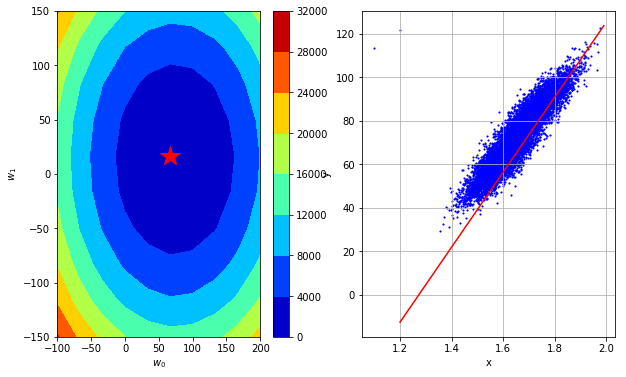

In [33]:
# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)